In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The line of code below is used for better aesthetics
sns.set_style("whitegrid")

In [2]:
try:
    df = pd.read_excel('TITANIC.xlsx')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'titanic.xlsx' not found. Please make sure the file is in the correct directory.")
    # You might want to exit or handle this error more gracefully in a real application
    exit()

Dataset loaded successfully!


In [3]:
# Display the first 5 rows of the DataFrame
print("First 5 rows of the dataset:")
print(df.head())

# Get a concise summary of the DataFrame, including data types and non-null values
print("\nDataset Info:")
df.info()

# Get descriptive statistics of numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values (Count):")
print(df.isnull().sum())

First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ----------

In [7]:
# Example: Fill missing 'Age' values with the median
# Using median is often preferred over mean for skewed distributions as it's less affected by outliers.
df['age'].fillna(df['age'].median(), inplace=True)

# Example: Fill missing 'Embarked' values with the mode (most frequent value)
# 'mode()[0]' is used because mode() can return multiple values if they have the same frequency.
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Example: Drop the 'Cabin' column due to a large number of missing values or irrelevance for these questions
# If you decide to use it, you'd need a more complex strategy.
df.drop('deck', axis=1, inplace=True)

# Verify that missing values are handled
print("\nMissing Values after handling:")
print(df.isnull().sum())

C:\Users\Hermes\AppData\Local\Temp\ipykernel_14756\3759313084.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Hermes\AppData\Local\Temp\ipykernel_14756\3759313084.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For


Missing Values after handling:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64



1. Survival Rate of Passengers: 38.38%


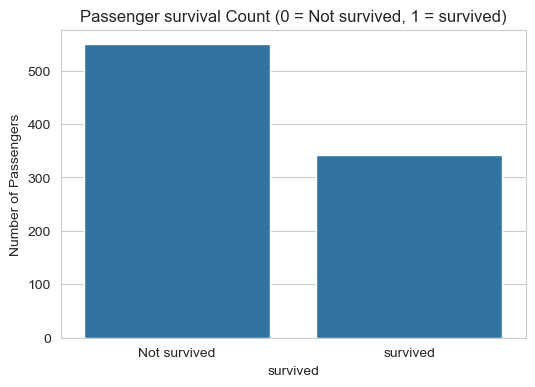

In [8]:
# This answers the first business question
# The survival rate of passengers.

survival_rate = df['survived'].mean() * 100
print(f"\n1. Survival Rate of Passengers: {survival_rate:.2f}%")

# You can also visualize this
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=df)
plt.title('Passenger survival Count (0 = Not survived, 1 = survived)')
plt.xlabel('survived')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['Not survived', 'survived'])
plt.show()


2. Gender Distribution of Passengers:
sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64


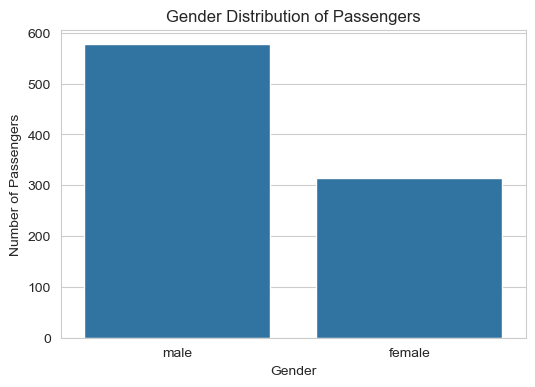

In [11]:
# Question 2
# The gender distribution of passengers

gender_distribution = df['sex'].value_counts(normalize=True) * 100
print("\n2. Gender Distribution of Passengers:")
print(gender_distribution)

plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution of Passengers')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()


3. Survival Rate by Passenger Class:
pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64


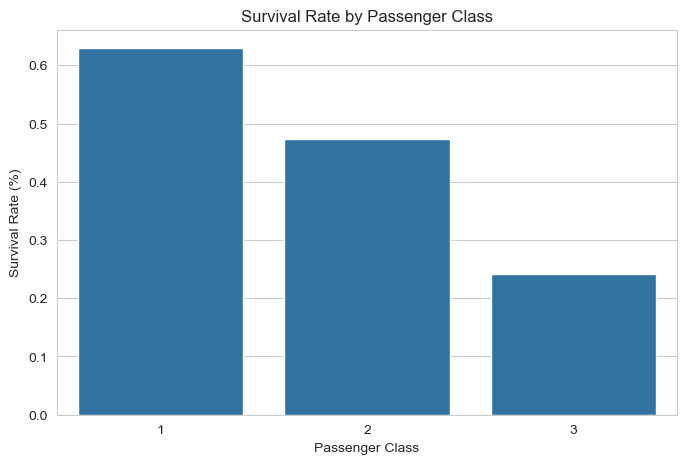

In [12]:
# Question 3
# How does survival rate differ by class.

survival_by_class = df.groupby('pclass')['survived'].mean() * 100
print("\n3. Survival Rate by Passenger Class:")
print(survival_by_class)

plt.figure(figsize=(8, 5))
sns.barplot(x='pclass', y='survived', data=df, errorbar=None) # errorbar=None hides confidence intervals
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.show()

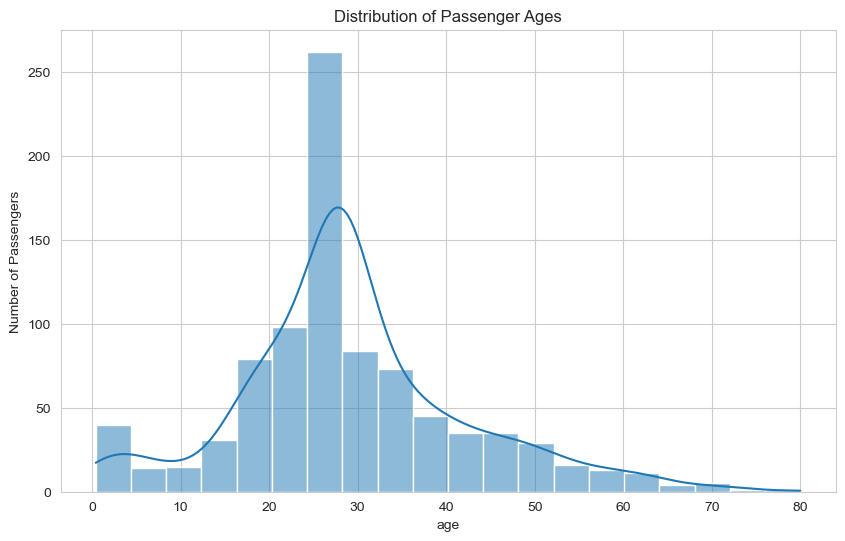


4. Average Age: 29.36
   Median Age: 28.00


In [14]:
# Question 4.
# The distribution of passenger ages?

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True) # kde=True adds a Kernel Density Estimate line
plt.title('Distribution of Passenger Ages')
plt.xlabel('age')
plt.ylabel('Number of Passengers')
plt.show()

print(f"\n4. Average Age: {df['age'].mean():.2f}")
print(f"   Median Age: {df['age'].median():.2f}")


5. Number of Passengers Embarked from Each Location:
embarked
S    646
C    168
Q     77
Name: count, dtype: int64


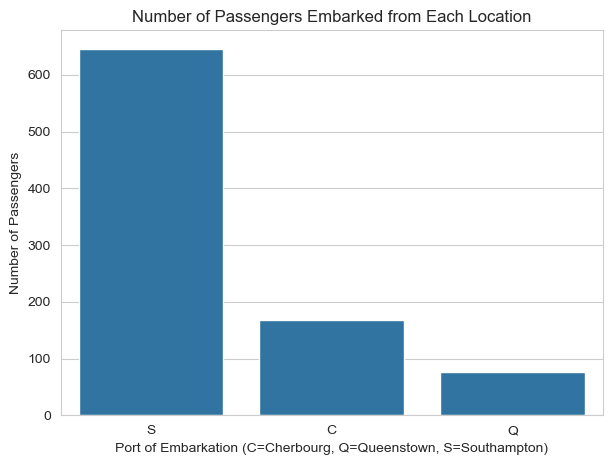

In [16]:
# Question 5
# This shows how many passengers embarked from each location

embarkation_counts = df['embarked'].value_counts()
print("\n5. Number of Passengers Embarked from Each Location:")
print(embarkation_counts)

plt.figure(figsize=(7, 5))
sns.countplot(x='embarked', data=df)
plt.title('Number of Passengers Embarked from Each Location')
plt.xlabel('Port of Embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.ylabel('Number of Passengers')
plt.show()


6. Average Fare Paid per Class:
pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64


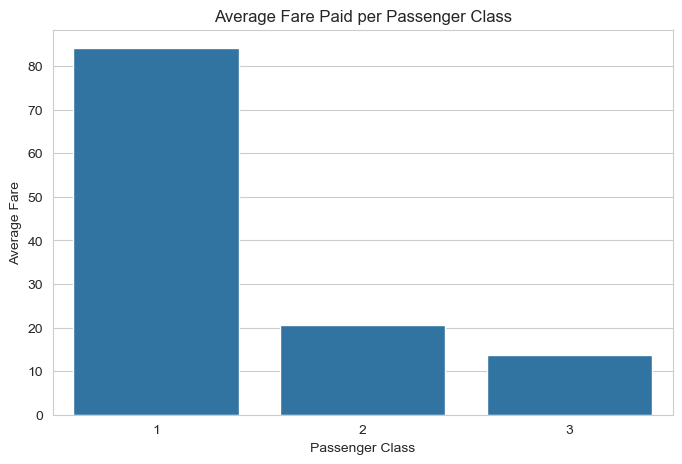

In [17]:
# Question 6
# This shows the average fare paid per class.

average_fare_per_class = df.groupby('pclass')['fare'].mean()
print("\n6. Average Fare Paid per Class:")
print(average_fare_per_class)

plt.figure(figsize=(8, 5))
sns.barplot(x='pclass', y='fare', data=df, errorbar=None)
plt.title('Average Fare Paid per Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.show()


7. Survival Rate by Gender:
sex
female    74.203822
male      18.890815
Name: survived, dtype: float64


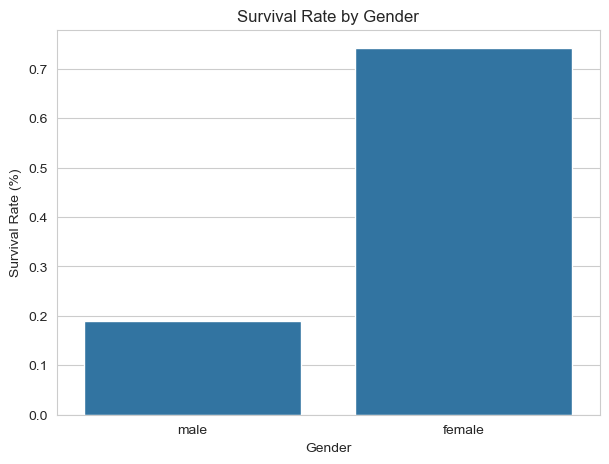


Survival Counts by Gender:
survived    0    1
sex               
female     81  233
male      468  109


In [18]:
# Question 7
# This shows how gender affect survival rates.

survival_by_gender = df.groupby('sex')['survived'].mean() * 100
print("\n7. Survival Rate by Gender:")
print(survival_by_gender)

plt.figure(figsize=(7, 5))
sns.barplot(x='sex', y='survived', data=df, errorbar=None)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')
plt.show()

# You can also look at the counts of survived/not survived by gender
print("\nSurvival Counts by Gender:")
print(pd.crosstab(df['sex'], df['survived']))


8. Correlation between Fare and Survival: 0.26


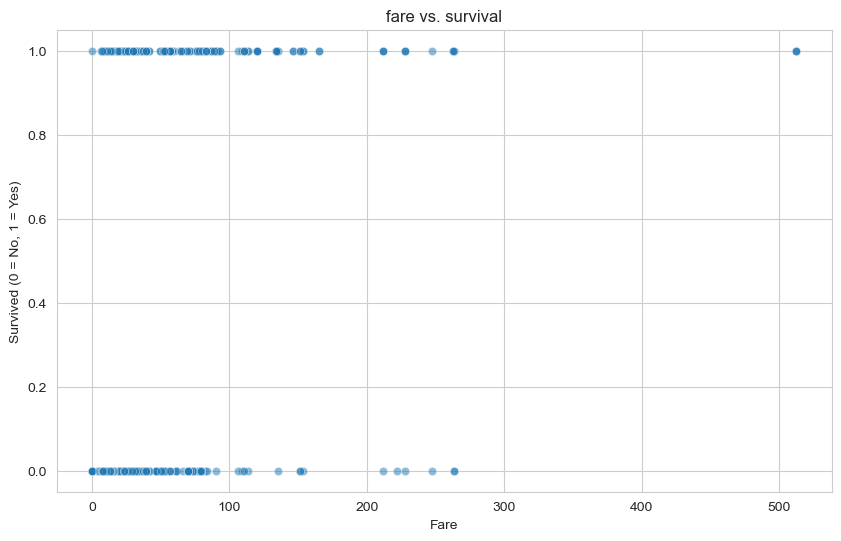

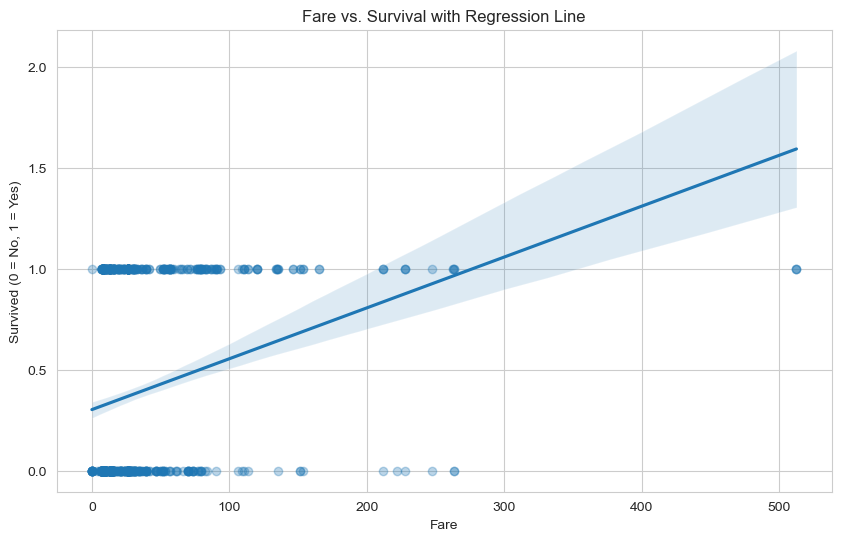

In [19]:
# Question 8.
# This shows the correlation between fare and survival in the Titanic dataset.

correlation_fare_survival = df['fare'].corr(df['survived'])
print(f"\n8. Correlation between Fare and Survival: {correlation_fare_survival:.2f}")

# You can also visualize this using a scatter plot or a regression plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fare', y='survived', data=df, alpha=0.5)
plt.title('fare vs. survival')
plt.xlabel('Fare')
plt.ylabel('Survived (0 = No, 1 = Yes)')
plt.show()

# A regplot can show a linear relationship
plt.figure(figsize=(10, 6))
sns.regplot(x='fare', y='survived', data=df, scatter_kws={'alpha':0.3})
plt.title('Fare vs. Survival with Regression Line')
plt.xlabel('Fare')
plt.ylabel('Survived (0 = No, 1 = Yes)')
plt.show()

In [ ]:
# Summary of the Business Analysis


# Survival Rate: Only about 38% of the passengers on the Titanic survived.

# Gender Distribution: The ship had significantly more male passengers than female passengers, typically around a 2:1 ratio.

# Survival by Class: First-class passengers had the highest survival rate, followed by second-class, and then third-class, which had the lowest survival rate. This clearly shows the impact of socio-economic status on survival chances.

# Age Distribution: The majority of passengers were young adults and middle-aged individuals, with fewer very young children or elderly people. The average age hovered around 29-30 years.

# Embarkation Points: Most passengers embarked from Southampton (S), with significantly fewer boarding from Cherbourg (C) and Queenstown (Q).

# Fare per Class: As expected, first-class passengers paid the highest average fares, followed by second-class, and then third-class passengers, who paid the lowest.

# Gender and Survival: Female passengers had a considerably higher survival rate than male passengers, reflecting the "women and children first" protocol.

# Fare and Survival Correlation: There was a positive correlation between the fare paid and survival. Passengers who paid higher fares (and were generally in higher classes) had a better chance of surviving.


